# **Proyecto Final**
## **Series de tiempo en python**
#####  ***KEVIN CRISTOPHER J. ALVARADO MALDONADO***

#####  ***Introduccion***
El pronóstico de series temporales en palabras simples significa pronosticar o predecir el valor futuro (por ejemplo, el precio de las acciones) durante un período de tiempo. Hay diferentes enfoques para predecir el valor, considere un ejemplo, hay una empresa XYZ que registra el tráfico del sitio web en cada hora y ahora quiere pronosticar el tráfico total de la próxima hora. Si le pregunto, ¿cuál será su enfoque para pronosticar el tráfico de la próxima hora?

Sin importar el enfoque que tengamos, hay 3 elementos que hay que tomar en cuenta:

##### *1. Estacionalidad*:
La estacionalidad es un término simple que significa que, mientras se predicen los datos de una serie temporal, hay algunos meses en un dominio particular donde el valor de salida está en su punto máximo en comparación con otros meses, se puede observar un patron.

##### *2. Tendencia*: 
La tendencia también es uno de los factores importantes que describen que ciertamente hay una serie temporal de tendencia creciente o decreciente, lo que en realidad significa que el valor de la organización o las ventas durante un período de tiempo y la estacionalidad aumentan o disminuyen.

##### *3. Evento Estocastico*: 
Los eventos inesperados significan que ocurren algunos cambios dinámicos en una organización o en el mercado que no se pueden capturar. por ejemplo, una pandemia actual que estamos sufriendo, y si observa el gráfico Sensex o ingenioso, hay una gran disminución en el precio de las acciones, que es un evento inesperado que ocurre en los alrededores.

Se están utilizando métodos y algoritmos que nos permiten capturar la estacionalidad y la tendencia. Pero el evento inesperado ocurre de forma dinámica, por lo que capturarlo se vuelve mas complicado.

## Con prácticas de suavizado exponencial
#### Carga de datos

<AxesSubplot:xlabel='id'>

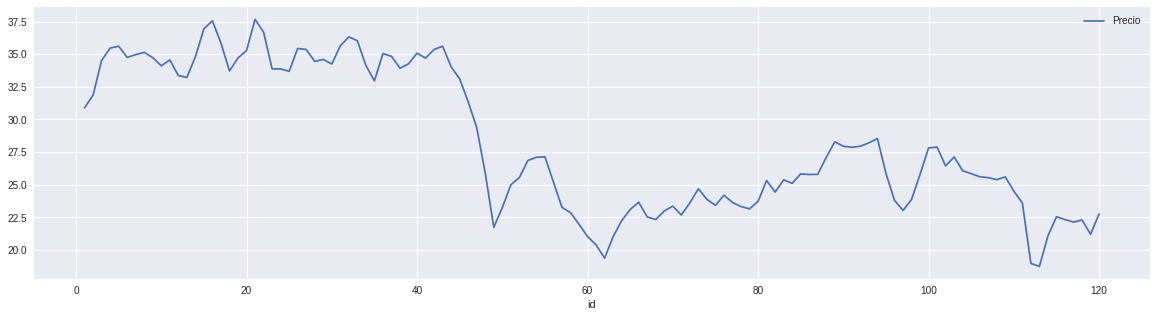

In [48]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
from scipy.integrate import odeint
plt.style.use('seaborn')



rcParams["figure.figsize"] = 20,5
df = pd.read_csv("data3.csv", header=0, index_col=0)
df.apply(pd.to_numeric)
#plt.plot(df)
df.plot(kind='line')
#plt.xticks(rotation=30)
#plt.show()
#df

#### Metodo MA - Moving Average
calcular el promedio móvil usando una ventana, lo mismo se aplica a nuestro conjunto de datos y obtendremos estadísticas continuas y encontraremos su media. después de la media, si trazamos el gráfico, puede ver la diferencia en el suavizado de un gráfico con respecto al original.

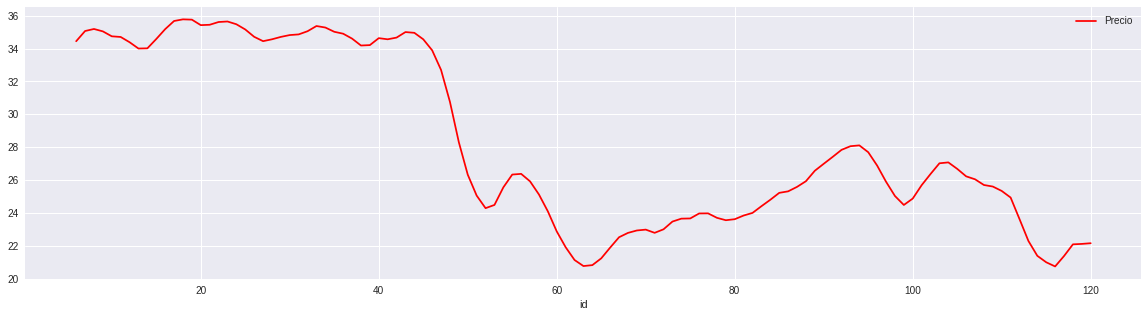

In [49]:
rollingseries = df[1:120].rolling(window=5)
rollingmean = rollingseries.mean() #we can compute any statistical measure
#print(rollingmean.head(10))
rollingmean.plot(color="red")
plt.show()

#### Suavizado exponencial simple
Tiene un parámetro conocido como alfa que define cuánto peso queremos dar a la observación reciente. ajustaremos 2 modelos, uno con alto valor y otro con menor valor de alfa, y compararemos ambos.

/home/rednew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/rednew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/rednew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


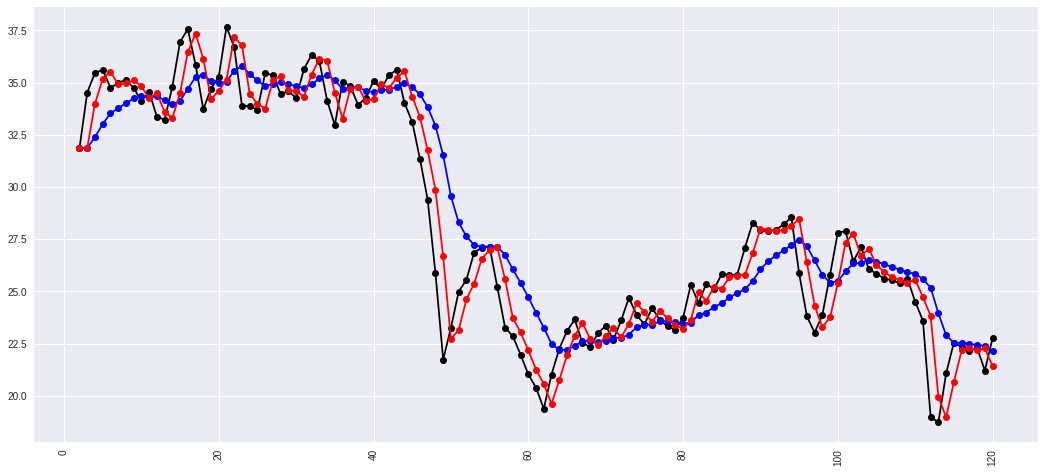

In [50]:
data = df[1:120]
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)
fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8, optimized=False)
plt.figure(figsize=(18, 8))
plt.plot(df[1:120], marker='o', color="black") #Original
plt.plot(fit1.fittedvalues, marker="o", color="b") #Alpha low
plt.plot(fit2.fittedvalues, marker="o", color="r") #Alpha high
plt.xticks(rotation="vertical")
plt.show()

#### Método de Holt para el suavizado exponencial
El método de Holt es un método popular para el suavizado exponencial y también se conoce como suavizado exponencial lineal. Pronostica los datos con la tendencia. Funciona en tres ecuaciones separadas que trabajan juntas para generar el pronóstico final. apliquemos esto a nuestros datos y experimentemos los cambios. En el primer ajuste, asumimos que hay una tendencia lineal en los datos, y en el segundo ajuste, tenemos un suavizado exponencial.

/home/rednew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/rednew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


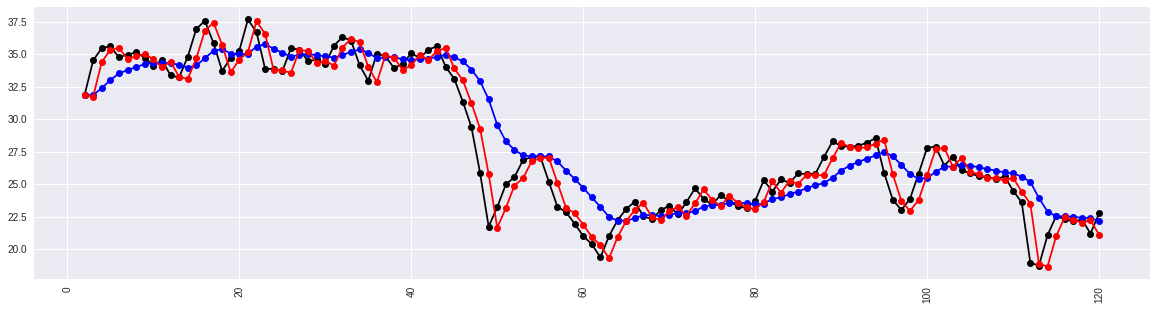

In [51]:
it1 = Holt(data).fit()  #linear trend
fit2 = Holt(data, exponential=True).fit()  #exponential trend
plt.plot(data, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='b')
plt.plot(fit2.fittedvalues, marker='o', color='r')
plt.xticks(rotation="vertical")
plt.show()

AHORA CON EL METODO DE DESCOMPOSICION

<AxesSubplot:xlabel='id'>

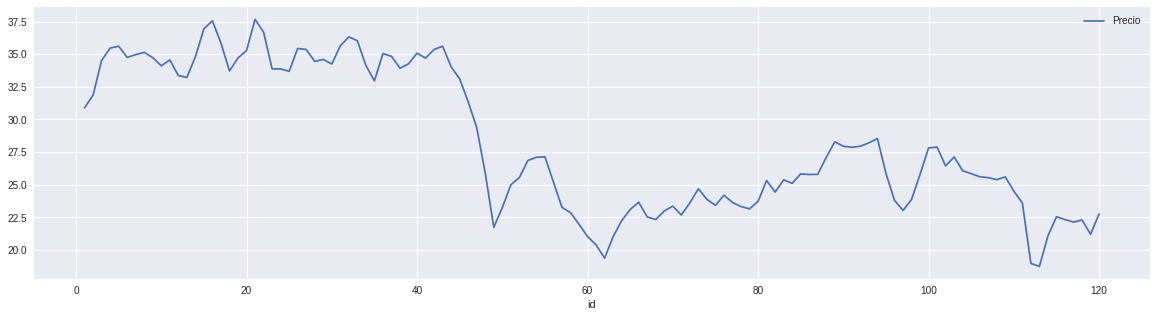

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd
import matplotlib.pyplot as plt

""" entrada = pd.read_csv('data3.csv')
df = entrada

plt.rcParams.update({'figure.figsize': (10,6)})
df.plot() """

rcParams["figure.figsize"] = 20,5
df = pd.read_csv("data3.csv", header=0, index_col=0)
df.apply(pd.to_numeric)
#plt.plot(df)
df.plot(kind='line')

In [39]:
# Additive Decomposition
add_result = seasonal_decompose(df['Precio'], model='additive',period=1)
# Multiplicative Decomposition 
mul_result = seasonal_decompose(df['Precio'], model='multiplicative',period=1)

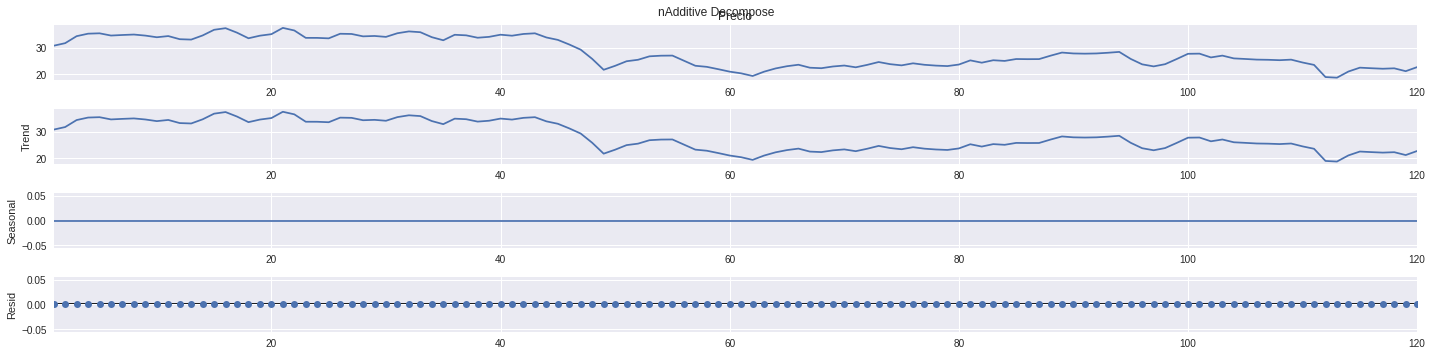

In [53]:
add_result.plot().suptitle('nAdditive Decompose', fontsize=12)
plt.show()

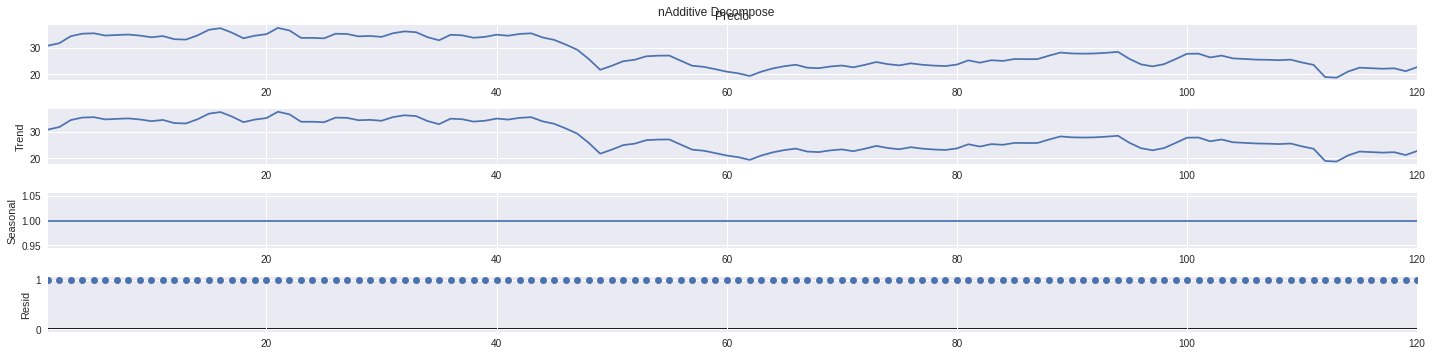

In [54]:
mul_result.plot().suptitle('nAdditive Decompose', fontsize=12)
plt.show()

In [43]:
new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head()

,seasoanilty,trend,residual,actual_values
id,,,,
1,0.0,30.89,0.0,30.89
2,0.0,31.86,0.0,31.86
3,0.0,34.52,0.0,34.52
4,0.0,35.47,0.0,35.47
5,0.0,35.61,0.0,35.61


#### Prueba Dickey Fuller
Estacionario es con media constantemente y varianza constante. Adfuller es una prueba simple que dice que si la serie de tiempo es estacionaria. La hipótesis nula es que las series de tiempo no son estacionarias. Si el valor p es inferior al 5 por ciento, rechace la hipótesis nula; de lo contrario, acepte la hipótesis NULL.

In [46]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(df.Precio.values, autolag='AIC')
print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')
for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.4887833600141713
p-value: 0.5390525733696099
Critial Values:
   1%, -3.487517288664615
Critial Values:
   5%, -2.8865777180380032
Critial Values:
   10%, -2.5801239192052012
